# Visualization for Two-Sided CHSH-Breaking Noise

This notebook plots data obtained using the scripts:
* ./script/chsh-breaking_two-sided_amplitude_damping.py
* ./script/chsh-breaking_two-sided_depolarizing.py
* ./script/chsh-breaking_two-sided_phase_damping.py

In [396]:
from context import QNetOptimizer as QNopt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pennylane import numpy as np
import json

from os import listdir
from os.path import isfile, join
import re

In [338]:
def analyze_data_files(data_files):
    data_dicts = []
    for filepath in data_files:
        with open(filepath) as file:
            data_dicts.append(json.load(file))
    
    x_mesh = np.array(data_dicts[0]["x_mesh"])
    y_mesh = np.array(data_dicts[0]["y_mesh"])
    
    # aggregating results from different optimizations
    results = [[[] for x in range(x_mesh.shape[1])] for y in range(x_mesh.shape[0])]
    for data_dict in data_dicts:
        for row_id in range(x_mesh.shape[0]):
            for col_id in range(x_mesh.shape[1]):
                if np.isnan(data_dict["max_scores"][row_id][col_id]):
                    continue
            
                results[row_id][col_id].append(data_dict["max_scores"][row_id][col_id])
    
    # analyizing aggregated results
    max_scores = [
        [max(results[row_id][col_id]) for col_id in range(x_mesh.shape[1])]
        for row_id in range(x_mesh.shape[0])
    ]
    mean_scores = [
        [np.mean(results[row_id][col_id], axis=0) for col_id in range(x_mesh.shape[1])]
        for row_id in range(x_mesh.shape[0])
    ]
    std_errs = [
        [
            np.std(results[row_id][col_id], axis=0) / np.sqrt(len(results[row_id][col_id]))
            for col_id in range(x_mesh.shape[1])
        ]
        for row_id in range(x_mesh.shape[0])
    ]
    
    
    return x_mesh, y_mesh, max_scores, mean_scores, std_errs, results    

In [392]:
# getting amplitude damping data
max_entangled_amp_path = "../../script/data/chsh-breaking_two-sided_amplitude_damping/max_entangled/"
max_entangled_amp_files = [
    join(max_entangled_amp_path, f) for f in listdir(max_entangled_amp_path) if (
        f.endswith(".json") and isfile(join(max_entangled_amp_path, f))
    )
]
print("num max entangled files : ", len(max_entangled_amp_files))
ent_x_mesh, ent_y_mesh, ent_max_scores, ent_mean_scores, ent_std_errs, ent_results = analyze_data_files(max_entangled_amp_files)

arb_amp_path = "../../script/data/chsh-breaking_two-sided_amplitude_damping/arbitrary/"
arb_amp_files = [
    join(arb_amp_path, f) for f in listdir(arb_amp_path) if (
        f.endswith(".json") and isfile(join(arb_amp_path, f))
    )
]
print("num arbitrary files : ", len(arb_amp_files))
(
    arb_x_mesh, arb_y_mesh, arb_max_scores, arb_mean_scores, arb_std_errs, arb_results
) = analyze_data_files(arb_amp_files)


# getting depolarizing data
max_entangled_dep_path = "../../script/data/chsh-breaking_two-sided_depolarizing/max_entangled/"
max_entangled_dep_files = [
    join(max_entangled_dep_path, f) for f in listdir(max_entangled_dep_path) if (
        f.endswith(".json") and isfile(join(max_entangled_dep_path, f))
    )
]
print("num dep max entangled files : ", len(max_entangled_dep_files))
(
    dep_ent_x_mesh, dep_ent_y_mesh, dep_ent_max_scores, dep_ent_mean_scores, dep_ent_std_errs, dep_ent_results
) = analyze_data_files(max_entangled_dep_files)

arb_dep_path = "../../script/data/chsh-breaking_two-sided_depolarizing/arbitrary/"
arb_dep_files = [
    join(arb_dep_path, f) for f in listdir(arb_dep_path) if (
        f.endswith(".json") and isfile(join(arb_dep_path, f))
    )
]
print("num dep arbitrary files : ", len(arb_dep_files))
(
    dep_arb_x_mesh, dep_arb_y_mesh, dep_arb_max_scores, dep_arb_mean_scores, dep_arb_std_errs, dep_arb_results
) = analyze_data_files(arb_dep_files)

# getting phase damping data
max_entangled_pha_path = "../../script/data/chsh-breaking_two-sided_phase_damping/max_entangled/"
max_entangled_pha_files = [
    join(max_entangled_pha_path, f) for f in listdir(max_entangled_pha_path) if (
        f.endswith(".json") and isfile(join(max_entangled_pha_path, f))
    )
]
print("num pha max entangled files : ", len(max_entangled_pha_files))
(
    pha_ent_x_mesh, pha_ent_y_mesh, pha_ent_max_scores, pha_ent_mean_scores, pha_ent_std_errs, pha_ent_results
) = analyze_data_files(max_entangled_pha_files)

arb_pha_path = "../../script/data/chsh-breaking_two-sided_phase_damping/arbitrary/"
arb_pha_files = [
    join(arb_pha_path, f) for f in listdir(arb_pha_path) if (
        f.endswith(".json") and isfile(join(arb_pha_path, f))
    )
]
print("num pha arbitrary files : ", len(arb_pha_files))
(
    pha_arb_x_mesh, pha_arb_y_mesh, pha_arb_max_scores, pha_arb_mean_scores, pha_arb_std_errs, pha_arb_results
) = analyze_data_files(arb_pha_files)

num max entangled files :  11
num arbitrary files :  10
num dep max entangled files :  11
num dep arbitrary files :  11
num pha max entangled files :  11
num pha arbitrary files :  10


## Phase Damping

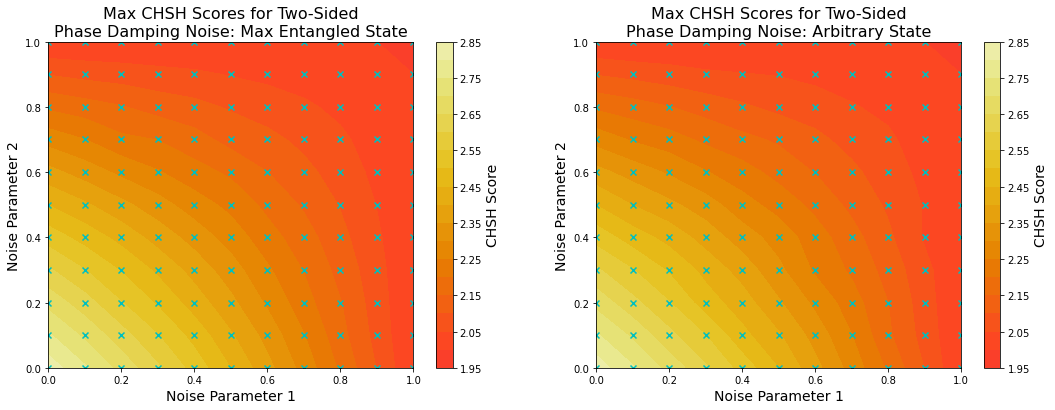

maximum difference between arbitrary and max entangled scores :  0.010132924587160197
minimum difference between arbitrary and max entangled scores :  -0.018638403964544192
[1.9999996720086162, 1.9941879717274227, 1.9983949362263818, 1.9998288759301386, 1.9996265871343222, 1.9999512080192916, 1.9999907892582691, 1.9999933631059528, 1.999999241498427, 1.9999988906526946, 1.9999944858446796]


In [410]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 3, vcenter=2)

max_ent_plt = ax1.contourf(pha_ent_x_mesh, pha_ent_y_mesh, pha_ent_max_scores,16, cmap="CMRmap", norm=norm)
cbar1 = plt.colorbar(max_ent_plt, ax=ax1)

cbar1.set_label("CHSH Score", size=14)

ax1.set_title("Max CHSH Scores for Two-Sided\nPhase Damping Noise: Max Entangled State", size=16)
ax1.set_xlabel("Noise Parameter 1", size=14)
ax1.set_ylabel("Noise Parameter 2", size=14)

ax1.scatter(pha_ent_x_mesh, pha_ent_y_mesh, color="c", marker="x")

arb_plt = ax2.contourf(pha_arb_x_mesh, pha_arb_y_mesh, pha_arb_max_scores,16, cmap="CMRmap", norm=norm)
cbar2 = plt.colorbar(arb_plt, ax=ax2)

ax2.scatter(pha_arb_x_mesh, pha_arb_y_mesh, color="c", marker="x")

cbar2.set_label("CHSH Score", size=14)

ax2.set_title("Max CHSH Scores for Two-Sided\nPhase Damping Noise: Arbitrary State", size=16)
ax2.set_xlabel("Noise Parameter 1", size=14)
ax2.set_ylabel("Noise Parameter 2", size=14)

plt.show()
print(
    "maximum difference between arbitrary and max entangled scores : ",
    max([max(diff) for diff in np.array(pha_arb_max_scores)-np.array(pha_ent_max_scores)])
)
print(
    "minimum difference between arbitrary and max entangled scores : ",
    min([min(diff) for diff in np.array(pha_arb_max_scores)-np.array(pha_ent_max_scores)])
)

print(pha_arb_max_scores[10][:])

## Depolarizing

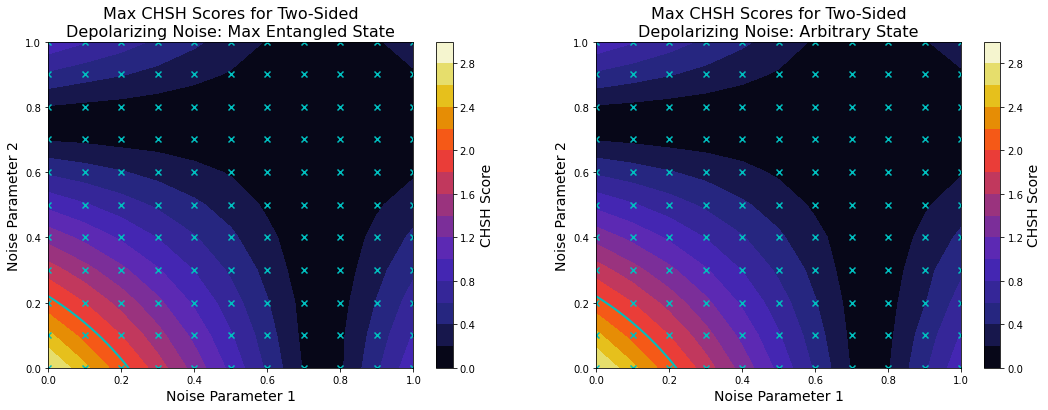

maximum difference between arbitrary and max entangled scores :  0.023693575150718793


In [409]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 3, vcenter=2)


max_ent_plt = ax1.contourf(dep_ent_x_mesh, dep_ent_y_mesh, dep_ent_max_scores,16, cmap="CMRmap", norm=norm)
cbar1 = plt.colorbar(max_ent_plt, ax=ax1)

cbar1.set_label("CHSH Score", size=14)

ax1.set_title("Max CHSH Scores for Two-Sided\nDepolarizing Noise: Max Entangled State", size=16)
ax1.set_xlabel("Noise Parameter 1", size=14)
ax1.set_ylabel("Noise Parameter 2", size=14)


xs = np.arange(0,3/4*(1-1/np.sqrt(2)),0.001)
ys = [3/4*(1-1/np.sqrt(2)/(1-4/3*x)) for x in xs]
ax1.plot(xs,ys, "c-", linewidth=2)

ax1.scatter(dep_ent_x_mesh, dep_ent_y_mesh, color="c", marker="x")

arb_plt = ax2.contourf(dep_arb_x_mesh, dep_arb_y_mesh, dep_arb_max_scores,16, cmap="CMRmap", norm=norm)
cbar2 = plt.colorbar(arb_plt, ax=ax2)

ax2.plot(xs,ys, "c-", linewidth=2)

ax2.scatter(dep_arb_x_mesh, dep_arb_y_mesh, color="c", marker="x")

cbar2.set_label("CHSH Score", size=14)

ax2.set_title("Max CHSH Scores for Two-Sided\nDepolarizing Noise: Arbitrary State", size=16)
ax2.set_xlabel("Noise Parameter 1", size=14)
ax2.set_ylabel("Noise Parameter 2", size=14)



plt.show()
print(
    "maximum difference between arbitrary and max entangled scores : ",
    max([max(np.abs(diff)) for diff in np.array(dep_arb_max_scores)-np.array(dep_ent_max_scores)])
)

# Amplitude damping

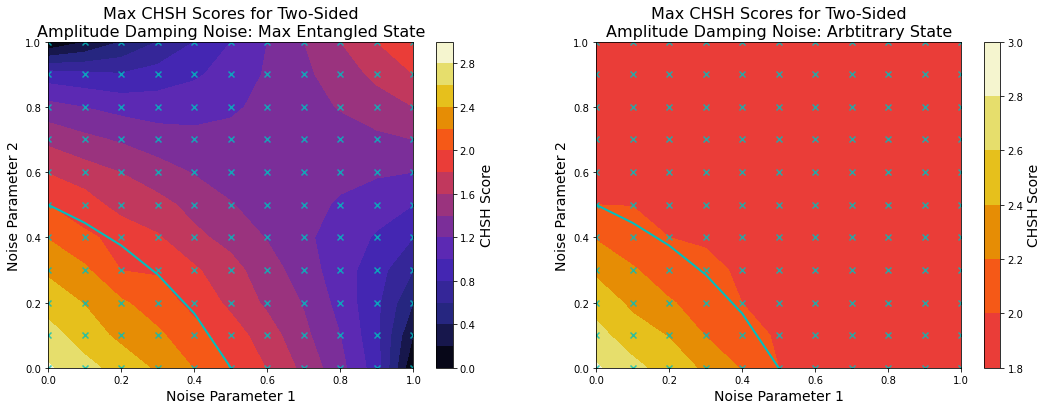

potential violation to product of noise parameters rule
2.0132726735424376
0.30000000000000004
0.30000000000000004
[1.8779712826946493, 1.9828435213818583, 1.9027286397590424, 1.9700361368125874, 2.0132726735424376, 1.9806916752898185, 2.002978399912408, 2.009396633301672, 1.9435623475340198, 2.001638744938824]


In [411]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 3, vcenter=2)

max_ent_plt = ax1.contourf(ent_x_mesh, ent_y_mesh, ent_max_scores, 16, cmap="CMRmap",norm=norm)
cbar1 = plt.colorbar(max_ent_plt, ax=ax1)
cbar1.set_label("CHSH Score", size=14)

xs = np.arange(0,0.51,0.1)
ys = [1-0.5/(1-x) for x in xs]
ax1.plot(xs,ys, "c-", linewidth=2)
ax1.scatter(ent_x_mesh, ent_y_mesh, color="c", marker="x", alpha=0.8)
ax1.set_title("Max CHSH Scores for Two-Sided\nAmplitude Damping Noise: Max Entangled State", size=16)
ax1.set_xlabel("Noise Parameter 1", size=14)
ax1.set_ylabel("Noise Parameter 2", size=14)

arb_plt = ax2.contourf(arb_x_mesh, arb_y_mesh, arb_max_scores, 4, cmap="CMRmap",norm=norm)
cbar2 = plt.colorbar(arb_plt, ax=ax2)
cbar2.set_label("CHSH Score", size=14)


ax2.plot(xs, ys, "c-", linewidth=2)
ax2.scatter(arb_x_mesh, arb_y_mesh, color="c", marker="x",alpha=0.8)

ax2.set_title("Max CHSH Scores for Two-Sided\nAmplitude Damping Noise: Arbtitrary State", size=16)
ax2.set_xlabel("Noise Parameter 1", size=14)
ax2.set_ylabel("Noise Parameter 2", size=14)

plt.show()

print("potential violation to product of noise parameters rule")
print(arb_max_scores[3][3])

print(arb_x_mesh[3][3])

print(arb_y_mesh[3][3])


print(arb_results[3][3])

## Scratch

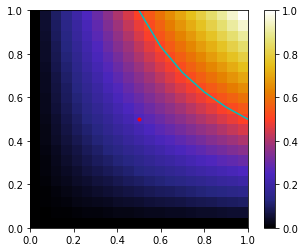

In [316]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mat = np.zeros((21,21))
for x in range(21):
    for y in range(21):
        mat[20-y,x] = (x)/20 * y/20

        
norm_noisy = mcolors.TwoSlopeNorm(vmin=0, vmax = 1, vcenter=0.5)

color_map = plt.imshow(mat, extent=[0,1,0,1],norm=norm_noisy)
color_map.set_cmap("CMRmap")
plt.colorbar()
plt.plot([0.5],[0.5], "r.")

xs = np.arange(0.5,1.01,0.1)
ys = [0.5/x for x in xs]
plt.plot(xs,ys, "c")

plt.show()

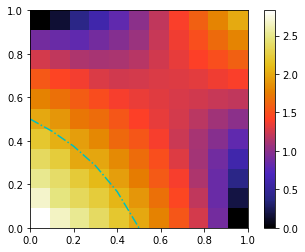

In [317]:
color_map = plt.imshow(np.flip(ent_max_scores,axis=0), extent=[0,1,0,1])
color_map.set_cmap("CMRmap")
xs = np.arange(0,0.51,0.1)
ys = [0.5/(x-1)+1 for x in xs]
plt.plot(xs,ys, "c-.")
plt.colorbar()


1.9799263438570711


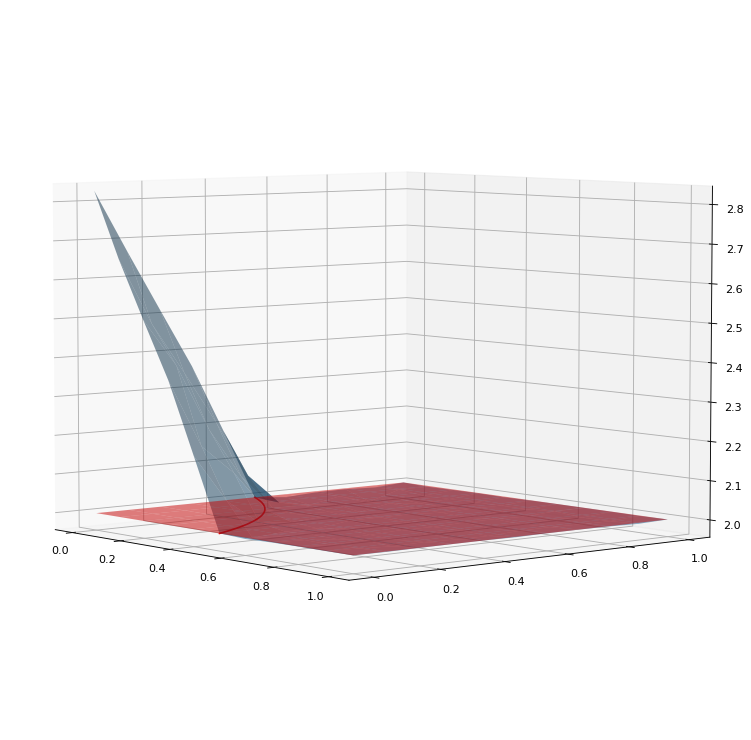

In [193]:

# norm = mcolors.TwoSlopeNorm(vmin=1.7, vmax = 3,vcenter=3/1.7)
# fig = plt.figure(size=(12,12))
plt.figure(figsize=(12, 12), dpi=80)
ax = plt.axes(projection="3d")

ax.plot_surface(np.array(arb_x_mesh), np.array(arb_y_mesh), np.ones((11,11))*2, alpha=0.5, color="r")#16, cmap="CMRmap")

ax.plot_surface(np.array(arb_x_mesh), np.array(arb_y_mesh), np.array(arb_max_scores), alpha=0.5)#16, cmap="CMRmap")
xs = np.arange(0,0.51,0.01)
ys = [0.5/(x-1)+1 for x in xs]
ax.plot3D(xs,ys,[2 for x in xs], "r", markersize=10)

# ys = [np.sqrt(0.5**2 - x**2) for x in xs]
# ax.scatter3D(xs,ys,[2 for x in xs], color="r", marker=8)
ax.view_init(5, -40)

print(arb_max_scores[1][5])


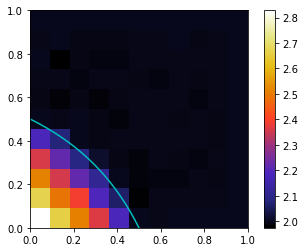

In [185]:
color_map = plt.imshow(np.flip(arb_max_scores,axis=0), extent=[0,1,0,1])
color_map.set_cmap("CMRmap")
xs = np.arange(0,0.51,0.01)
ys = [0.5/(x-1)+1 for x in xs]
# ys = [np.sqrt(0.5**2 - x**2) for x in xs]
plt.plot(xs,ys, "c")
plt.colorbar()

In [46]:
from mpl_toolkits import mplot3d

In [37]:
x_mesh, y_mesh = np.meshgrid([0,1,2,3],[0,0.5,1,2])

In [42]:
z_mesh = x_mesh + y_mesh

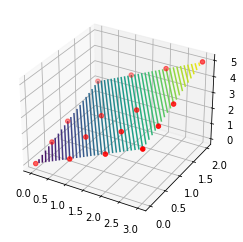

In [57]:
ax = plt.axes(projection="3d")
ax.contour3D(x_mesh, y_mesh, z_mesh, 50)
ax.scatter3D(x_mesh,y_mesh, z_mesh, color="r")